In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('Fraud_check.csv')

In [3]:
data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.3+ KB


### change the object to numeric

In [5]:
from sklearn.preprocessing import LabelEncoder

In [6]:
le=LabelEncoder()

In [7]:
data['Undergrad']=le.fit_transform(data['Undergrad'])
data['Marital.Status']=le.fit_transform(data['Marital.Status'])
data['Urban']=le.fit_transform(data['Urban'])

In [8]:
data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,2,68833,50047,10,1
1,1,0,33700,134075,18,1
2,0,1,36925,160205,30,1
3,1,2,50190,193264,15,1
4,0,1,81002,27533,28,0


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Undergrad        600 non-null    int32
 1   Marital.Status   600 non-null    int32
 2   Taxable.Income   600 non-null    int64
 3   City.Population  600 non-null    int64
 4   Work.Experience  600 non-null    int64
 5   Urban            600 non-null    int32
dtypes: int32(3), int64(3)
memory usage: 21.2 KB


In [10]:
data.shape

(600, 6)

In [11]:
data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
595    False
596    False
597    False
598    False
599    False
Length: 600, dtype: bool

In [12]:
data[data.duplicated()]

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban


In [13]:
data.isnull()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
595,False,False,False,False,False,False
596,False,False,False,False,False,False
597,False,False,False,False,False,False
598,False,False,False,False,False,False


<Axes: >

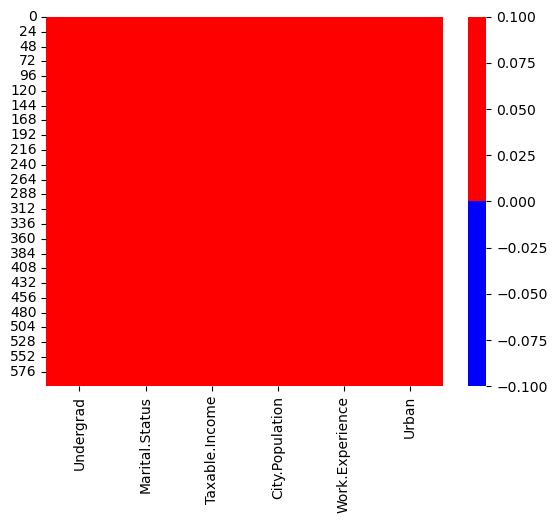

In [14]:
colors=['blue','red']
plt=sns.color_palette(colors)
sns.heatmap(data.isnull(),cmap=plt)

In [15]:
data.corr()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
Undergrad,1.000000,0.042407,-0.049232,0.079579,-0.005362,-0.000267
Marital.Status,0.042407,1.000000,-0.012944,-0.001564,-0.002213,0.064562
Taxable.Income,-0.049232,-0.012944,1.000000,-0.064387,-0.001818,0.070628
City.Population,0.079579,-0.001564,-0.064387,1.000000,0.013135,-0.040098
Work.Experience,-0.005362,-0.002213,-0.001818,0.013135,1.000000,-0.094559
Urban,-0.000267,0.064562,0.070628,-0.040098,-0.094559,1.000000


<Axes: >

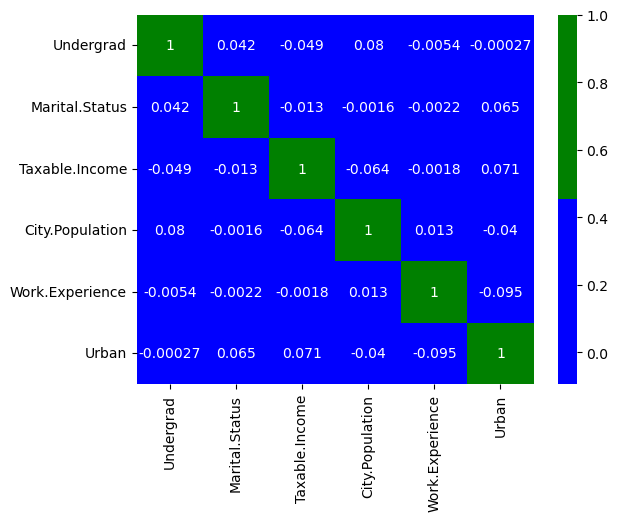

In [16]:
colors=['blue','green']
plt=sns.color_palette(colors)
sns.heatmap(data.corr(),cmap=plt,annot=True)

 # visualise the data

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

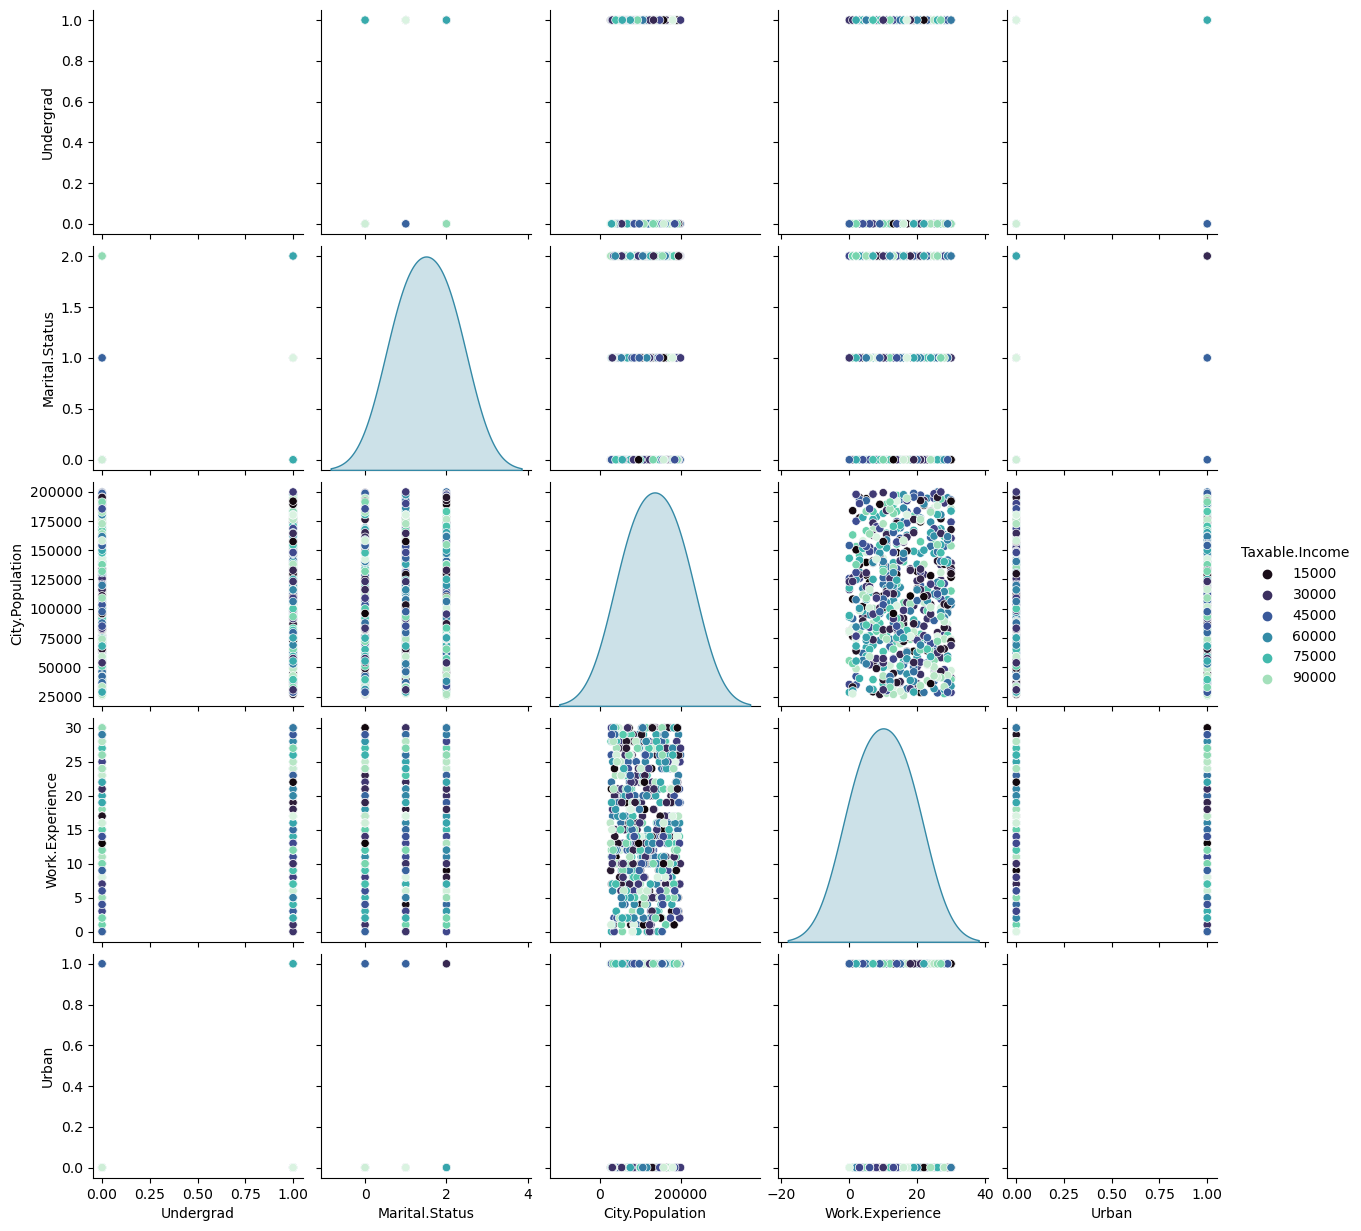

In [18]:
sns.pairplot(data,palette='mako',hue='Taxable.Income')
plt.show()

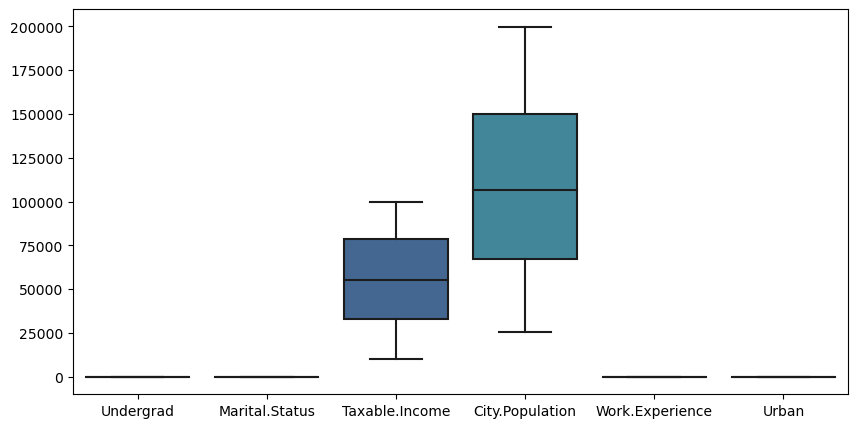

In [19]:
plt.figure(figsize=(10,5))
sns.boxplot(data,palette='mako')
plt.show()

### Split data into training and testing


In [20]:
x=data.iloc[:,:5]
y=data.iloc[:,5]

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((480, 5), (120, 5), (480,), (120,))

# Random Forest

In [23]:
from sklearn.ensemble import RandomForestClassifier

In [24]:
rf_model=RandomForestClassifier(n_estimators=50,max_features=4,max_depth=8,random_state=42)

In [25]:
rf_model.fit(x_train,y_train)

RandomForestClassifier(max_depth=8, max_features=4, n_estimators=50,
                       random_state=42)

### predict for training and testing data and calculate the metrics

In [26]:
from sklearn.metrics import confusion_matrix,classification_report,roc_curve,roc_auc_score

# training data

In [27]:
rftrain_pred=rf_model.predict(x_train)

In [28]:
confusion_matrix(y_train,rftrain_pred)

array([[240,   2],
       [  9, 229]], dtype=int64)

In [29]:
print(classification_report(y_train,rftrain_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98       242
           1       0.99      0.96      0.98       238

    accuracy                           0.98       480
   macro avg       0.98      0.98      0.98       480
weighted avg       0.98      0.98      0.98       480



In [30]:
train_proba=rf_model.predict_proba(x_train)

In [31]:
fpr,tpr,thresh=roc_curve(y_train,train_proba[:,1])

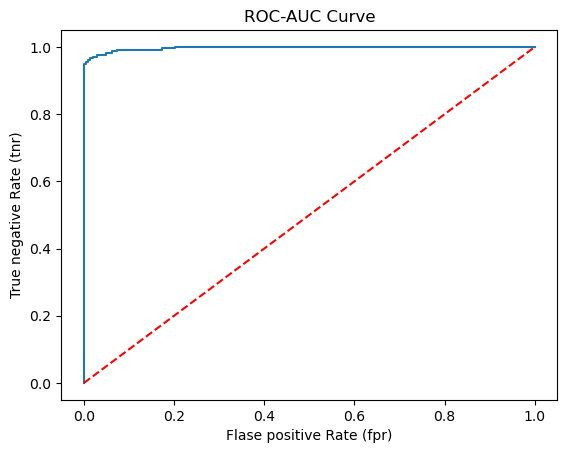

In [32]:
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],'r--')
plt.title('ROC-AUC Curve')
plt.xlabel('Flase positive Rate (fpr)')
plt.ylabel('True negative Rate (tnr)')
plt.show()

# testing data

In [33]:
rftest_pred=rf_model.predict(x_test)

In [34]:
confusion_matrix(y_test,rftest_pred)

array([[34, 22],
       [29, 35]], dtype=int64)

In [35]:
print(classification_report(y_test,rftest_pred))

              precision    recall  f1-score   support

           0       0.54      0.61      0.57        56
           1       0.61      0.55      0.58        64

    accuracy                           0.57       120
   macro avg       0.58      0.58      0.57       120
weighted avg       0.58      0.57      0.58       120



In [36]:
test_proba=rf_model.predict_proba(x_test)

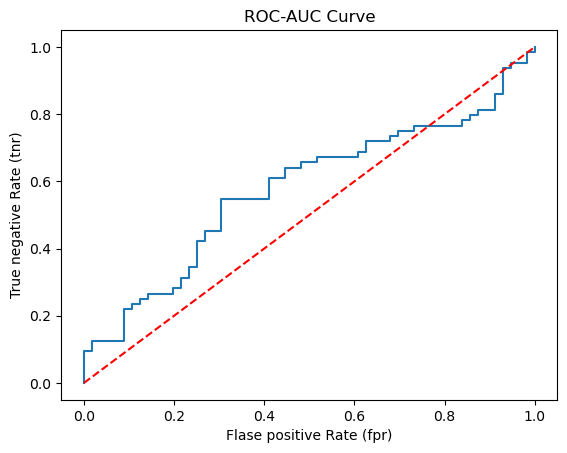

In [37]:
fpr,tpr,thresh=roc_curve(y_test,test_proba[:,1])
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],'r--')
plt.title('ROC-AUC Curve')
plt.xlabel('Flase positive Rate (fpr)')
plt.ylabel('True negative Rate (tnr)')
plt.show()

# Perform the Up-sampling for the above imbalanced data

In [38]:
from sklearn.datasets import make_classification
from sklearn.utils import resample

In [39]:
x, y = make_classification(n_samples=600, n_features=5, weights=[0.8, 0.2], random_state=42)

In [40]:
data= pd.DataFrame(data,columns=data.columns)
data['y'] = y
data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,y
0,0,2,68833,50047,10,1,0
1,1,0,33700,134075,18,1,1
2,0,1,36925,160205,30,1,0
3,1,2,50190,193264,15,1,1
4,0,1,81002,27533,28,0,0
...,...,...,...,...,...,...,...
595,1,0,76340,39492,7,1,0
596,1,0,69967,55369,2,1,1
597,0,0,47334,154058,0,1,0
598,1,1,98592,180083,17,0,0


In [41]:
majority_class = data[data['y'] == 0]
minority_class = data[data['y'] == 1]

In [42]:
upsampled_minority = resample(minority_class, replace=True, n_samples=len(majority_class), random_state=42)

In [43]:
df_upsampled = pd.concat([majority_class, upsampled_minority])
df_upsampled.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,y
0,0,2,68833,50047,10,1,0
2,0,1,36925,160205,30,1,0
4,0,1,81002,27533,28,0,0
5,0,0,33329,116382,0,0,0
6,0,0,83357,80890,8,1,0


In [44]:
X = df_upsampled.iloc[:,:6]
y = df_upsampled.iloc[:,6] 

In [45]:
X.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,2,68833,50047,10,1
2,0,1,36925,160205,30,1
4,0,1,81002,27533,28,0
5,0,0,33329,116382,0,0
6,0,0,83357,80890,8,1


In [46]:
y.head()

0    0
2    0
4    0
5    0
6    0
Name: y, dtype: int32

In [47]:
 from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((766, 6), (192, 6), (766,), (192,))

In [48]:
from sklearn.ensemble import RandomForestClassifier

In [49]:
rf_model=RandomForestClassifier(n_estimators=50,max_features=4,max_depth=8,random_state=42)

In [50]:
rf_model.fit(X_train,y_train)

RandomForestClassifier(max_depth=8, max_features=4, n_estimators=50,
                       random_state=42)

In [51]:
train_pred=rf_model.predict(X_train)
train_pred

array([0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1,

In [52]:
test_pred = rf_model.predict(X_test)

In [53]:
test_pred

array([1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1])

In [54]:
from sklearn.metrics import confusion_matrix,classification_report,roc_curve,roc_auc_score

In [55]:
cm=confusion_matrix(y_train,train_pred)
cm

array([[386,   7],
       [  4, 369]], dtype=int64)

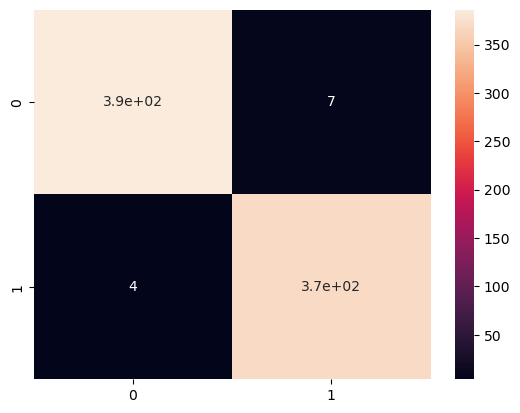

In [56]:
sns.heatmap(data=cm,annot=True)
plt.show()

In [57]:
print(classification_report(y_train,train_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       393
           1       0.98      0.99      0.99       373

    accuracy                           0.99       766
   macro avg       0.99      0.99      0.99       766
weighted avg       0.99      0.99      0.99       766



In [58]:
train_proba=rf_model.predict_proba(X_train)

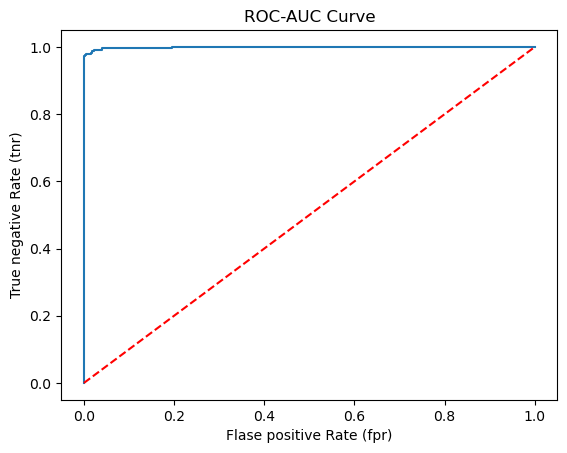

In [59]:
fpr,tpr,thresh=roc_curve(y_train,train_proba[:,1])
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],'r--')
plt.title('ROC-AUC Curve')
plt.xlabel('Flase positive Rate (fpr)')
plt.ylabel('True negative Rate (tnr)')
plt.show()

In [60]:
cm=confusion_matrix(y_test,test_pred)
cm

array([[72, 14],
       [ 8, 98]], dtype=int64)

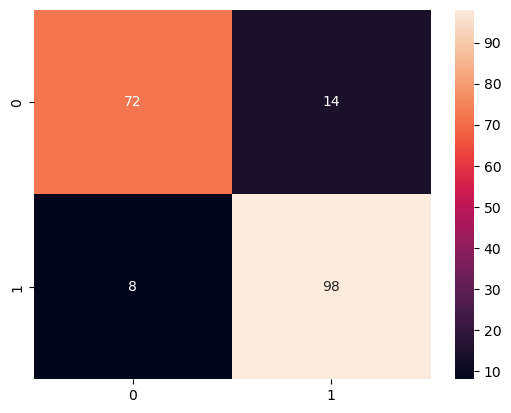

In [61]:
sns.heatmap(data=cm,annot=True)
plt.show()

In [62]:
print(classification_report(y_test,test_pred))

              precision    recall  f1-score   support

           0       0.90      0.84      0.87        86
           1       0.88      0.92      0.90       106

    accuracy                           0.89       192
   macro avg       0.89      0.88      0.88       192
weighted avg       0.89      0.89      0.88       192



In [63]:
test_proba=rf_model.predict_proba(X_test)

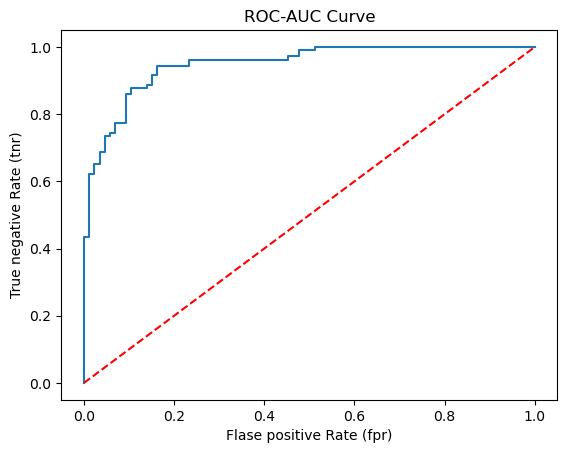

In [64]:
fpr,tpr,thresh=roc_curve(y_test,test_proba[:,1])
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],'r--')
plt.title('ROC-AUC Curve')
plt.xlabel('Flase positive Rate (fpr)')
plt.ylabel('True negative Rate (tnr)')
plt.show()

.

# ****************************************************************************************

.

Random Forest
 
Assignment


About the data: 
Let’s consider a Company dataset with around 10 variables and 400 records. 
The attributes are as follows: 
 Sales -- Unit sales (in thousands) at each location
 Competitor Price -- Price charged by competitor at each location
 Income -- Community income level (in thousands of dollars)
 Advertising -- Local advertising budget for company at each location (in thousands of dollars)
 Population -- Population size in region (in thousands)
 Price -- Price company charges for car seats at each site
 Shelf Location at stores -- A factor with levels Bad, Good and Medium indicating the quality of the shelving location for the car seats at each site
 Age -- Average age of the local population
 Education -- Education level at each location
 Urban -- A factor with levels No and Yes to indicate whether the store is in an urban or rural location
 US -- A factor with levels No and Yes to indicate whether the store is in the US or not
The company dataset looks like this: 
 
Problem Statement:
A cloth manufacturing company is interested to know about the segment or attributes causes high sale. 
Approach - A Random Forest can be built with target variable Sales (we will first convert it in categorical variable) & all other variable will be independent in the analysis.  


# read the data

In [65]:
data1=pd.read_csv('Company_Data.csv')

In [66]:
data1.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


# To convert the object to numeric

In [67]:
from sklearn.preprocessing import LabelEncoder

In [68]:
label_encoder=LabelEncoder()

In [69]:
data1['ShelveLoc']=le.fit_transform(data1['ShelveLoc'])
data1['US']=le.fit_transform(data1['US'])
data1['Urban']=le.fit_transform(data1['Urban'])

In [70]:
data1.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0,42,17,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0


In [71]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    int32  
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    int32  
 10  US           400 non-null    int32  
dtypes: float64(1), int32(3), int64(7)
memory usage: 29.8 KB


In [72]:
data1.shape

(400, 11)

In [73]:
data1.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
395    False
396    False
397    False
398    False
399    False
Length: 400, dtype: bool

In [74]:
data1.duplicated().sum()

0

In [75]:
data1.isnull()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
395,False,False,False,False,False,False,False,False,False,False,False
396,False,False,False,False,False,False,False,False,False,False,False
397,False,False,False,False,False,False,False,False,False,False,False
398,False,False,False,False,False,False,False,False,False,False,False


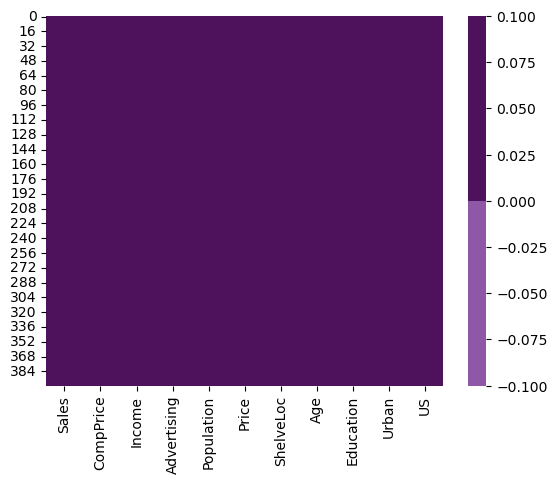

In [76]:
colours = ['#8F58A7','#4D125B'] 
pal = sns.color_palette(colours)
sns.heatmap(data1.isnull(), cmap=pal)
plt.show()

In [77]:
data1.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,1.307500,53.322500,13.900000,0.705000,0.645000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,0.833475,16.200297,2.620528,0.456614,0.479113
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,0.000000,25.000000,10.000000,0.000000,0.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,1.000000,39.750000,12.000000,0.000000,0.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,2.000000,54.500000,14.000000,1.000000,1.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,2.000000,66.000000,16.000000,1.000000,1.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,2.000000,80.000000,18.000000,1.000000,1.000000


In [78]:
data1.corr()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
Sales,1.000000,0.064079,0.151951,0.269507,0.050471,-0.444951,0.157470,-0.231815,-0.051955,-0.015419,0.177093
CompPrice,0.064079,1.000000,-0.080653,-0.024199,-0.094707,0.584848,0.023350,-0.100239,0.025197,0.066594,0.016869
Income,0.151951,-0.080653,1.000000,0.058995,-0.007877,-0.056698,-0.067678,-0.004670,-0.056855,0.037967,0.089601
Advertising,0.269507,-0.024199,0.058995,1.000000,0.265652,0.044537,0.008544,-0.004557,-0.033594,0.042035,0.684460
Population,0.050471,-0.094707,-0.007877,0.265652,1.000000,-0.012144,-0.044772,-0.042663,-0.106378,-0.052025,0.060564
Price,-0.444951,0.584848,-0.056698,0.044537,-0.012144,1.000000,0.014633,-0.102177,0.011747,0.047016,0.057861
ShelveLoc,0.157470,0.023350,-0.067678,0.008544,-0.044772,0.014633,1.000000,0.056488,0.001492,-0.063978,-0.039760
Age,-0.231815,-0.100239,-0.004670,-0.004557,-0.042663,-0.102177,0.056488,1.000000,0.006488,0.028479,0.008652
Education,-0.051955,0.025197,-0.056855,-0.033594,-0.106378,0.011747,0.001492,0.006488,1.000000,-0.033094,-0.078250
Urban,-0.015419,0.066594,0.037967,0.042035,-0.052025,0.047016,-0.063978,0.028479,-0.033094,1.000000,0.047085


[]

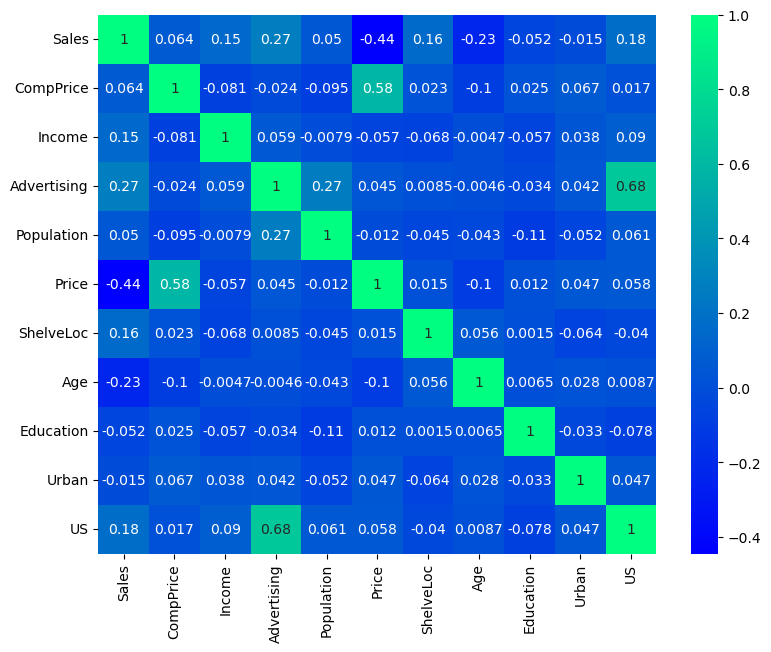

In [79]:
plt.figure(figsize=(9,7))
sns.heatmap(data1.corr(), cmap='winter', annot=True)
plt.plot()

visualise the data

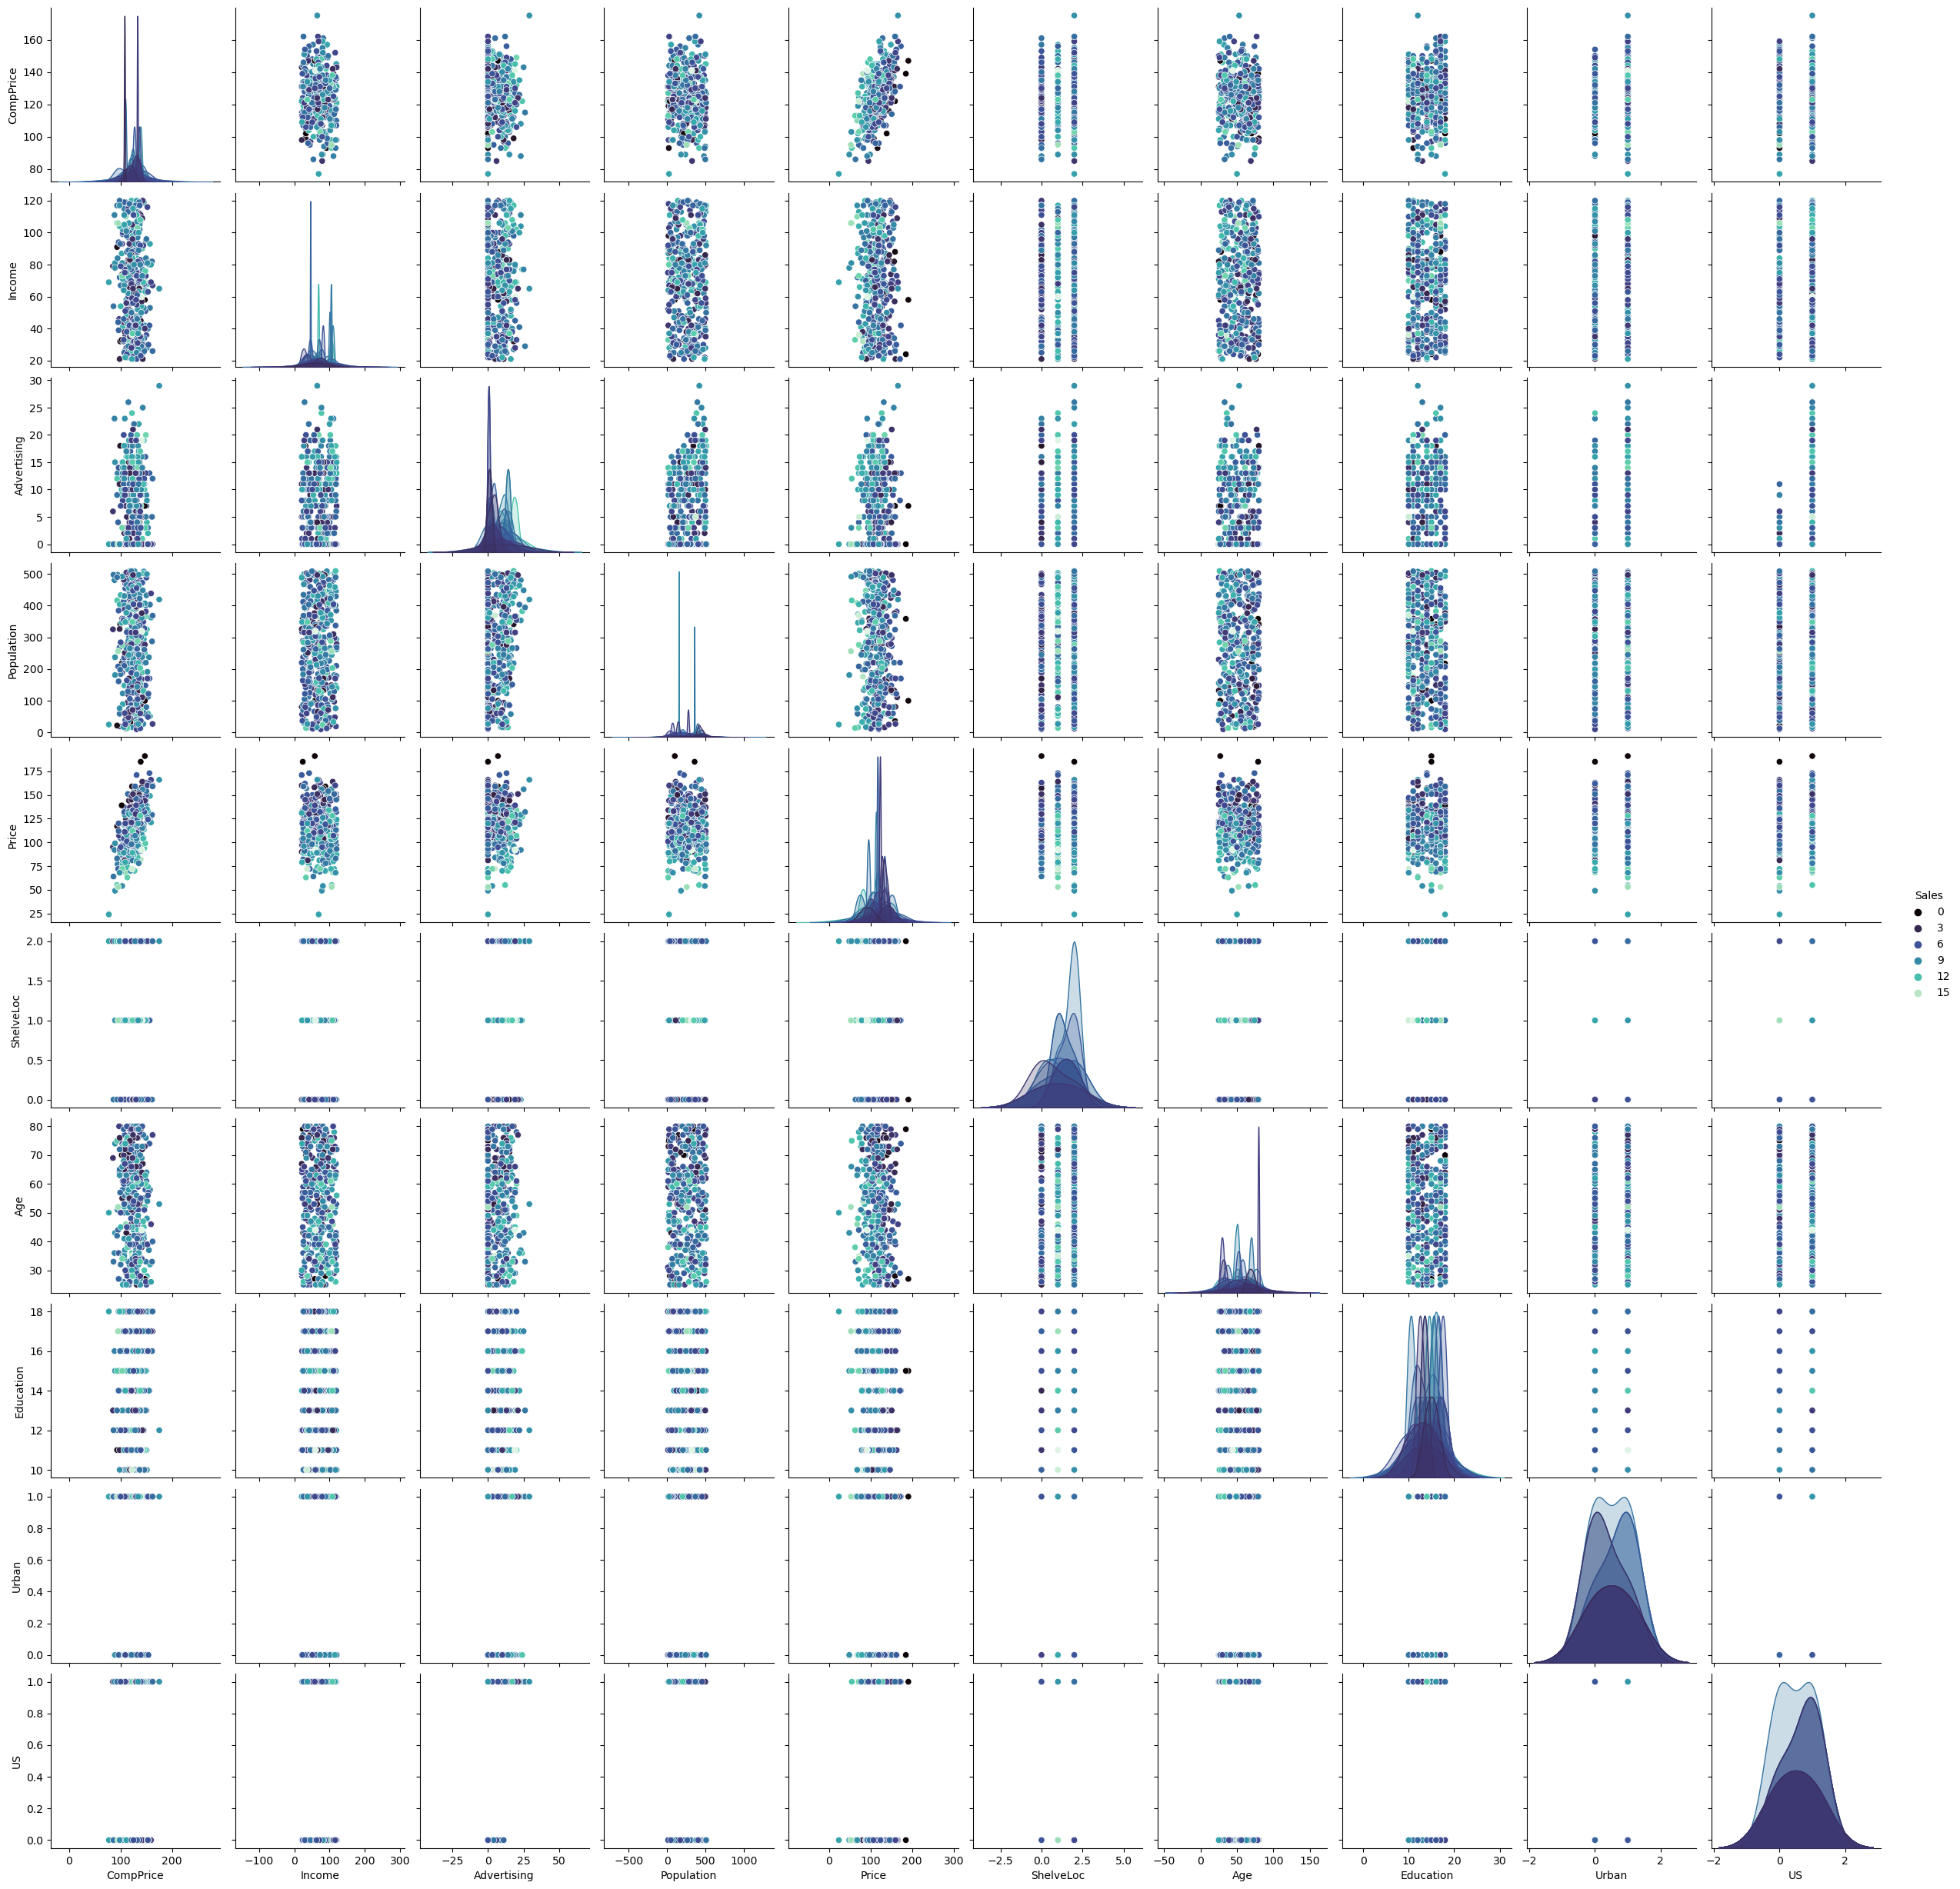

In [80]:
sns.pairplot(data1,palette='mako', hue='Sales')
plt.show()

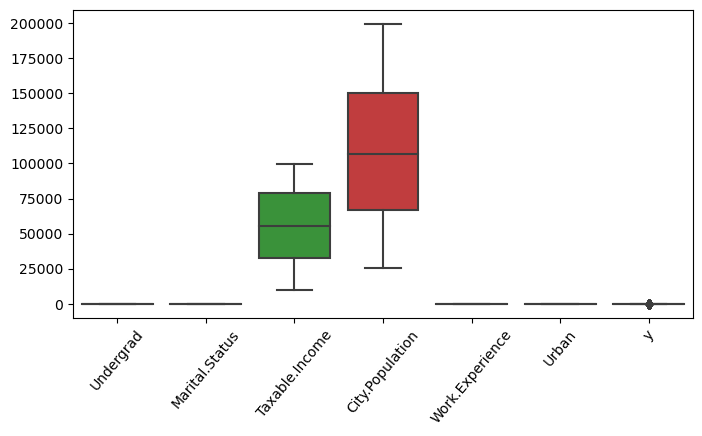

In [81]:
plt.figure(figsize=(8,4))
box = sns.boxplot(data = data)
plt.xticks(rotation=50)
plt.show()

split the data

In [82]:
X=data1.iloc[:,0:10]
y=data1.iloc[:,10]

In [83]:
X.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban
0,9.50,138,73,11,276,120,0,42,17,1
1,11.22,111,48,16,260,83,1,65,10,1
2,10.06,113,35,10,269,80,2,59,12,1
3,7.40,117,100,4,466,97,2,55,14,1
4,4.15,141,64,3,340,128,0,38,13,1


In [84]:
y.head()

0    1
1    1
2    1
3    1
4    0
Name: US, dtype: int32

In [85]:
from sklearn.model_selection import train_test_split

In [86]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((320, 10), (80, 10), (320,), (80,))

# Build the model for regressor

In [87]:
from sklearn.ensemble import RandomForestRegressor

In [88]:
rf_model=RandomForestRegressor(n_estimators=50,max_features=5,max_depth=8,max_leaf_nodes=10,random_state=42)

In [89]:
rf_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=8, max_features=5, max_leaf_nodes=10,
                      n_estimators=50, random_state=42)

In [90]:
train_pred=rf_model.predict(X_train)

In [91]:
train_pred

array([0.86552082, 0.40307563, 0.70699498, 0.96083278, 0.80406537,
       0.95308453, 0.31703615, 0.3253562 , 0.4410243 , 0.13110724,
       0.95316044, 0.93582105, 0.73241772, 0.96931119, 0.95332121,
       0.94525785, 0.14172161, 0.93102707, 0.25642535, 0.96379852,
       0.13868202, 0.93898049, 0.12167785, 0.1229863 , 0.87080768,
       0.95538301, 0.95743141, 0.09663897, 0.15831033, 0.93715822,
       0.56482224, 0.95019134, 0.93505952, 0.17046545, 0.92780869,
       0.96221658, 0.09866162, 0.93444803, 0.94816848, 0.95434652,
       0.96460142, 0.11268456, 0.9564696 , 0.13222845, 0.96411408,
       0.16045566, 0.96222619, 0.93877403, 0.1064359 , 0.45458066,
       0.94190076, 0.95576339, 0.1409985 , 0.44010936, 0.94116672,
       0.95432167, 0.28840105, 0.93226721, 0.94821845, 0.27089243,
       0.0947455 , 0.9519406 , 0.16895403, 0.15111187, 0.86554691,
       0.79917694, 0.5869893 , 0.93931495, 0.87408121, 0.50247099,
       0.13253803, 0.92994652, 0.94175468, 0.95998604, 0.94472

In [92]:
test_pred=rf_model.predict(X_test)
test_pred

array([0.89232595, 0.94679642, 0.94787156, 0.54139102, 0.16989546,
       0.34698832, 0.96315594, 0.94748886, 0.94302434, 0.76732587,
       0.13146009, 0.9503769 , 0.33161783, 0.1138159 , 0.95992688,
       0.28404851, 0.74446332, 0.94181225, 0.21342066, 0.94483794,
       0.90432931, 0.92060098, 0.22528399, 0.10677392, 0.9553563 ,
       0.78713406, 0.94246533, 0.15207452, 0.92105807, 0.10287475,
       0.95665036, 0.9657228 , 0.81409751, 0.38767315, 0.96110742,
       0.16829811, 0.94482537, 0.93378053, 0.70571499, 0.11473175,
       0.89472949, 0.95002332, 0.94705313, 0.34911504, 0.64261468,
       0.9161649 , 0.0953235 , 0.14530154, 0.91082949, 0.93037982,
       0.91534456, 0.92757812, 0.14912567, 0.96423457, 0.96462386,
       0.3002457 , 0.93270658, 0.94316927, 0.34448744, 0.12656463,
       0.14100515, 0.78543468, 0.81746314, 0.60082741, 0.16425082,
       0.92425746, 0.96708787, 0.1822891 , 0.94530217, 0.96462386,
       0.93079959, 0.9304919 , 0.86055641, 0.14337228, 0.84922

# check the parameter

In [93]:
from sklearn.metrics import mean_squared_error

In [97]:
train_mse=mean_squared_error(y_train,train_pred)
test_mse=mean_squared_error(y_test,test_pred)

In [98]:
train_mse,test_mse

(0.0513746391404515, 0.08869353544963535)

In [99]:
train_rmse=np.sqrt(train_mse)
test_rmse=np.sqrt(test_mse)

In [100]:
train_rmse,test_rmse

(0.22665974309623554, 0.2978145991210561)

In [101]:
from sklearn.manifold import TSNE

In [104]:
vmodel = TSNE(n_components=2)
tsne_comps = vmodel.fit_transform(X)

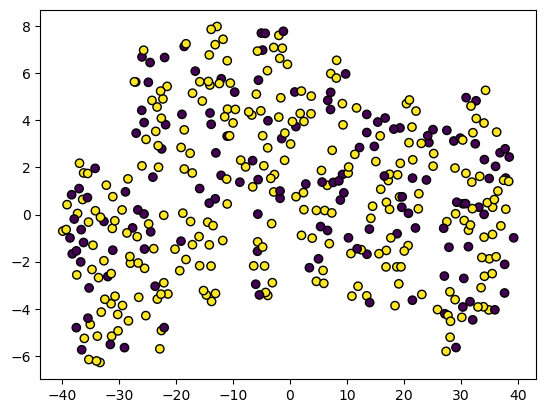

In [103]:
plt.scatter(tsne_comps[:,0],tsne_comps[:,1],c=y,cmap='viridis',edgecolor='k')
plt.show()